In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
import seaborn as sb

In [2]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\Social_Network_Ads.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
## Independent / dependent Variables
X = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [4]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
## Feature Scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
## Making predictions
y_predict = dtc.predict(X_test)

In [8]:
## Checking the accuracy
metrics.accuracy_score(y_test, y_predict)

0.9

In [9]:
print(metrics.confusion_matrix(y_test, y_predict))

[[62  6]
 [ 4 28]]


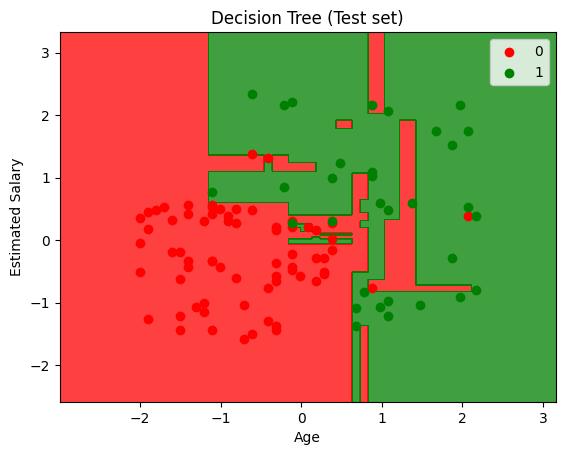

In [10]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, dtc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(("red", "green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(("red", "green"))(i), label=j)
plt.title("Decision Tree (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


In [11]:
features = df[['Age','EstimatedSalary']]
feature_cols = list(features.columns)
feature_cols

['Age', 'EstimatedSalary']

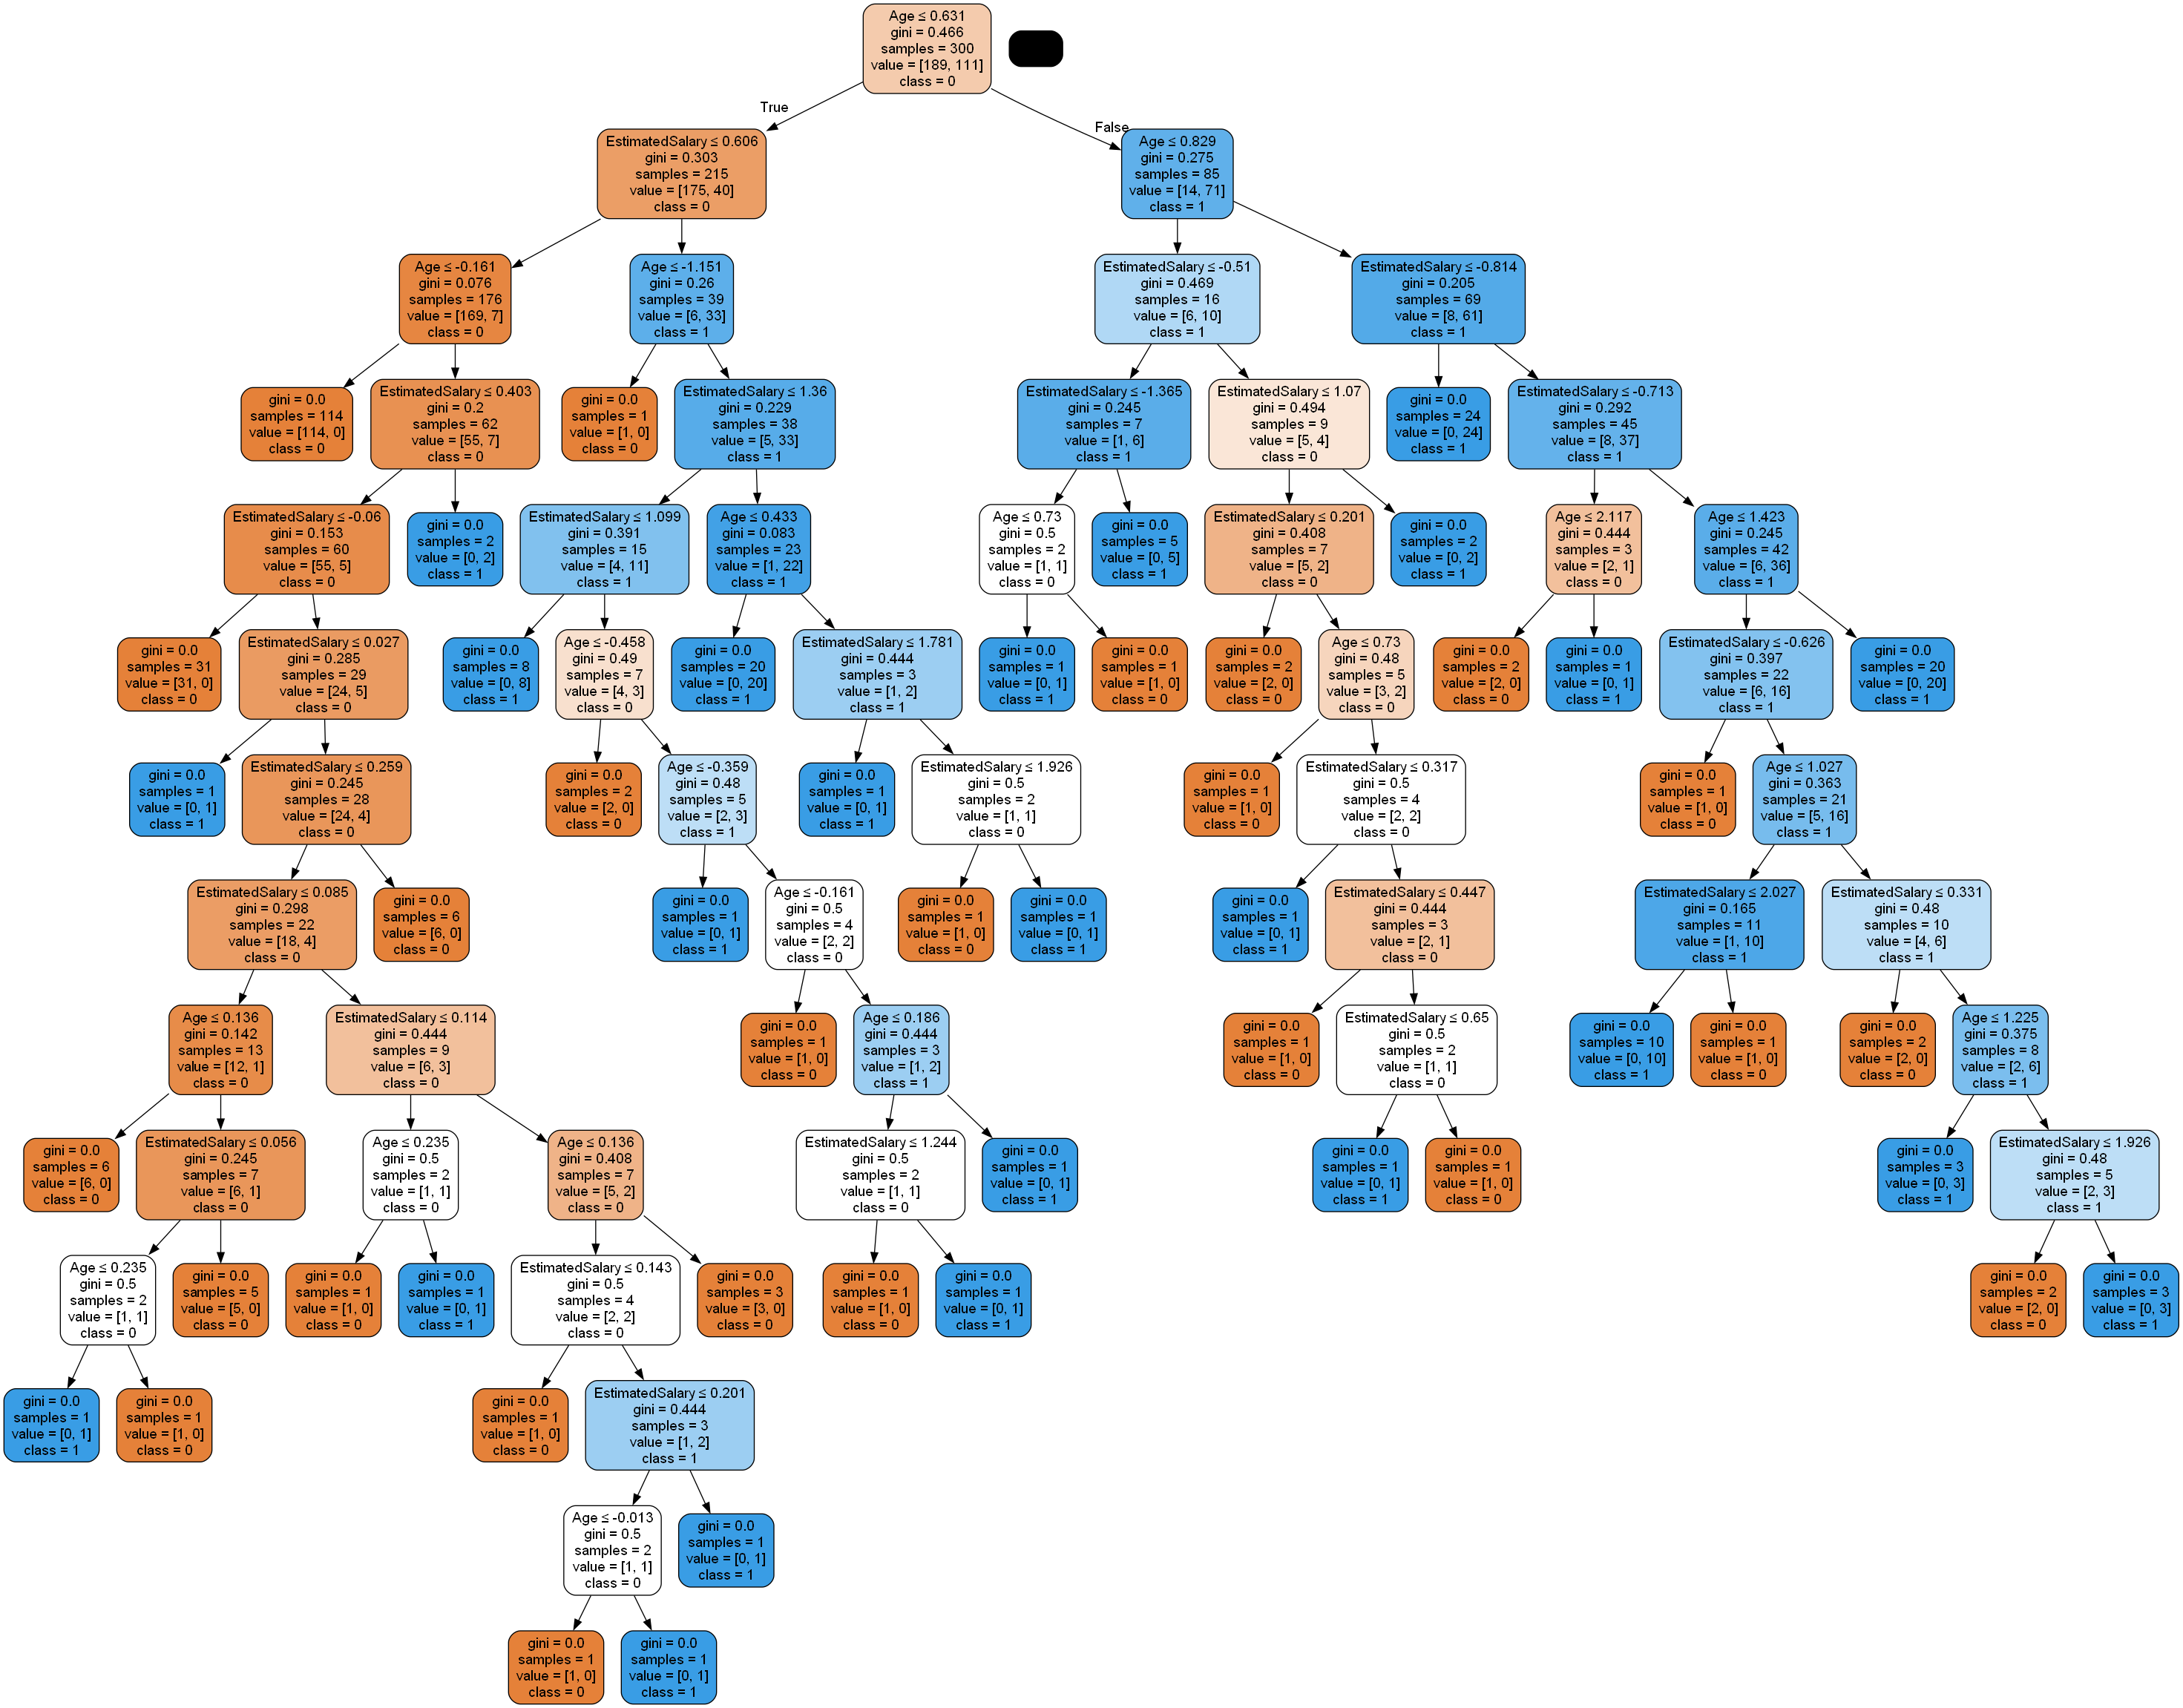

In [14]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
## Pruning the decision tree
dtc_p = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc_p = dtc_p.fit(X_train, y_train)
y_predict_p = dtc_p.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict_p))

0.94


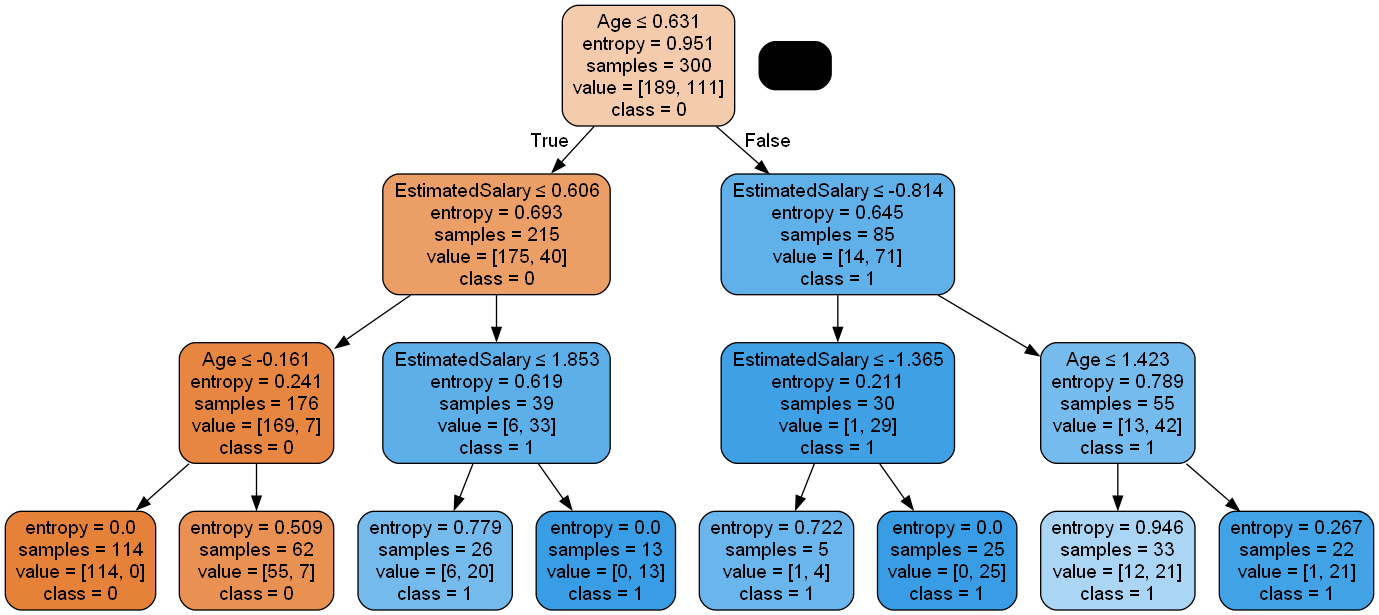

In [16]:
dot_data = StringIO()
export_graphviz(dtc_p, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())